<a href="https://colab.research.google.com/github/canaranjo23/AA-IG-CamiloNaranjo/blob/main/TP4_Clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(12823, 6)
(2000, 3)


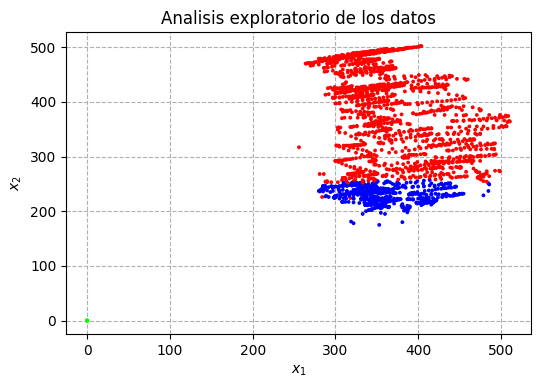

In [2]:
# TP4-Clasificación. 
# Camilo Naranjo 
# Curso Aprendizaje Automatico - IG - 2022

# Librerias
import numpy as np
import scipy.io
from matplotlib import pyplot as plt

# Leemos los datos
data = scipy.io.loadmat('/content/Datos_03.mat')
x = data.get('phi_t')   # Data x
t = data.get('t_Conjunto_1') # Data t -> Vector de la clasificación

print(x.shape)
print(t.shape)

tl = np.zeros(len(t))

tl[t[:,0]==1] = 0
tl[t[:,1]==1] = 1
tl[t[:,2]==1] = 2

# plot
fig, ax = plt.subplots(dpi=100)
ax.scatter(x[0:2000,4], x[0:2000,3], s=3.0, c=tl, cmap='brg', zorder=3)
plt.title('Analisis exploratorio de los datos')
plt.xlabel(r'$x_1$')
plt.ylabel('$x_2$')
plt.grid(True, linestyle='--', zorder=0)



X shape:  (2000, 6)
t shape:  (2000, 3)

Wn Shape:  (6, 3)
[[-1.15441416e+00 -7.77425607e-01  9.31839765e-01]
 [ 6.38678152e-02 -6.07134190e-02 -3.15439625e-03]
 [-1.25748322e-01  1.24942306e-01  8.06016512e-04]
 [ 5.92671457e-02 -5.97507475e-02  4.83601804e-04]
 [-1.53857781e-02  1.65554889e-02 -1.16971077e-03]
 [ 2.34484049e-02 -2.63667580e-02  2.91835307e-03]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Porcentaje de avance:   0.0
Porcentaje de avance:   0.9900990099009901
Porcentaje de avance:   1.9801980198019802
Porcentaje de avance:   2.9702970297029703
Porcentaje de avance:   3.9603960396039604
Porcentaje de avance:   4.9504950495049505
Porcentaje de avance:   5.9405940594059405
Porcentaje de avance:   6.9306930693069315
Porcentaje de avance:   7.920792079207921
Porcentaje de avance:   8.91089108910891
Porcentaje de avance:   9.900990099009901
Porcentaje de avance:   10.891089108910892
Porcentaje de avance:   11.881188118811881
Porcentaje de avance:   12.871287128712872
Porcentaje de avance:   13.861386138613863
Porcentaje de avance:   14.85148514851485
Porcentaje de avance:   15.841584158415841
Porcentaje de avance:   16.831683168316832
Porcentaje de avance:   17.82178217821782
Porcentaje de avance:   18.81188118811881
Porcentaje de avance:   19.801980198019802
Porcentaje de avance:   20.792079207920793
Porcentaje de avance:   21.782178217821784
Porcentaje de avance:   22.772277

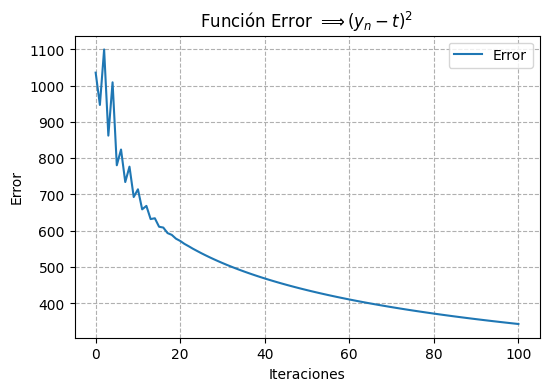

In [4]:
# Seleccionamos un subset de datos
N = 2000         # Se toma un subset de N datos
k = 3           # Clases para la clasificación
xn = x[:N,:]
tn = t[:N,:]

print('')
print('X shape: ', xn.shape)
print('t shape: ', tn.shape)

xInv = np.linalg.pinv(xn)   # Calculamos la inversa de la matriz X
wn = xInv @ tn             # Calculamos la matrix Wn inicial con los datos de entrenamiento

print('')
print('Wn Shape: ', wn.shape)
print(wn)

# ------------------------------------------------------------------------------
#  ENTRENAMIENTO 
# ------------------------------------------------------------------------------

# Se utiliza la Wn calculada inicialmente para hacer el calculo de los yn utilizando la funcion tanh()
yn = np.tanh( xn @ wn )

# Definimos la variable para guardar los valores de la Función Error
J = []

# Teniendo en cuenta la formulada de Newton-Raphson adaptada para este caso, se calculan los nuevos 
# Wn con el objetivo de disminuir el error entre los valores de yn y t. Se tiene:
iter = 101   # Definimos un número de iteraciones

for i in range(iter): 
  wo = wn     # W_old. Se actualiza

  # Para construir la primera región (R1)
  R1 = np.diag( yn[:,0]**2 )
  Z1 = xn @ wo[:,0] - np.linalg.pinv(R1) @ (yn[:,0] - tn[:,0])
  wn[:,0] = np.linalg.pinv( np.transpose(xn) @ R1 @ xn ) @ np.transpose(xn) @ R1 @ Z1

  # Para construir la segunda región (R2)
  R2 = np.diag( yn[:,1]**2 )
  Z2 = xn @ wo[:,1] - np.linalg.pinv(R2) @ (yn[:,1] - tn[:,1])
  wn[:,1] = np.linalg.pinv( np.transpose(xn) @ R2 @ xn ) @ np.transpose(xn) @ R2 @ Z2

  # Para construir la segunda región (R3)
  R3 = np.diag( yn[:,2]**2 )
  Z3 = xn @ wo[:,2] - np.linalg.pinv(R3) @ (yn[:,2] - tn[:,2])
  wn[:,2] = np.linalg.pinv( np.transpose(xn) @ R3 @ xn ) @ np.transpose(xn) @ R3 @ Z3

  # ------------------------------------------------------------------------------
  # Se actualizan los valores de yn
  yn = np.tanh( xn @ wn )

  # Calculo del error - Función Error
  J = np.append(J, np.sum((yn - tn)**2))

  print('Porcentaje de avance:  ', np.str((i/iter)*100) )

fig = plt.figure(dpi=100)
plt.plot(J, label='Error')
plt.title(r'Función Error $ \Longrightarrow  (y_n-t)^2$')
plt.xlabel(r'Iteraciones')
plt.ylabel('Error')
plt.grid(True, linestyle='--')
plt.legend()

print('wn = \n', wn)

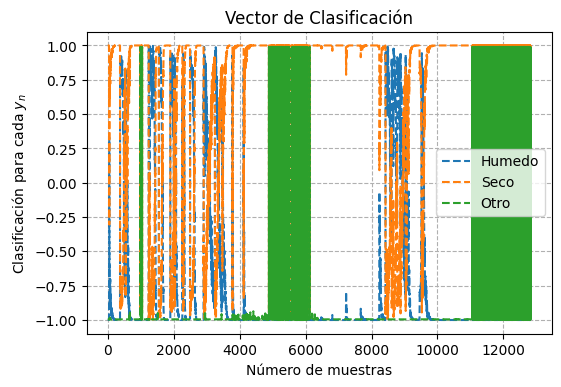

In [8]:
# ------------------------------------------------------------------------------
#  CLASIFICACIÓN 
# ------------------------------------------------------------------------------

# Se clasifican todos los datos
y = np.tanh( x @ wn )

fig = plt.figure(dpi=100)
plt.plot(y[:,0], label='Humedo', linestyle='--')
plt.plot(y[:,1], label='Seco', linestyle='--')
plt.plot(y[:,2], label='Otro', linestyle='--')
plt.title('Vector de Clasificación')
plt.xlabel('Número de muestras')
plt.ylabel(r'Clasificación para cada $y_n$')
plt.grid(True, linestyle='--')
plt.legend()

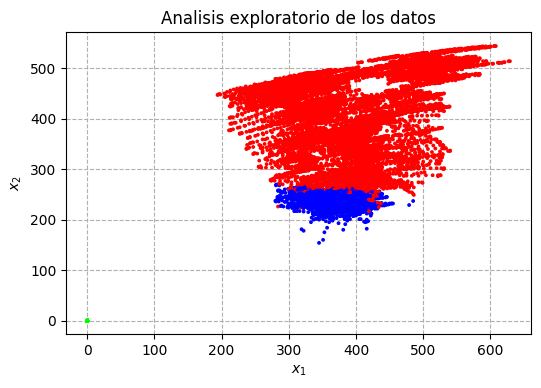

In [10]:
yl = np.zeros(len(y))

yl[y[:,0]>0] = 0
yl[y[:,1]>0] = 1
yl[y[:,2]>0] = 2

# plot
fig, ax = plt.subplots(dpi=100)
ax.scatter(x[:,4], x[:,3], s=3.0, c=yl, cmap='brg', zorder=3)
plt.title('Analisis exploratorio de los datos')
plt.xlabel(r'$x_1$')
plt.ylabel('$x_2$')
plt.grid(True, linestyle='--', zorder=0)